In [1]:
# Ocean Heat Budget Analyses in the Antarctica continental shelf (WAOM)

# Fabio B Dias - 15 August 2023
# Description:
#     this script get the heat transport across 1500m calculate for individual experiments:
# WAOM10: WAOM10extend_shflim_S_0.25Q_Cross-1500m-Transport.ipynb
# WAOM4: WAOM4extend_shflim_S_0.25Q_Cross-1500m-Transport.py
# WAOM4-NOTIDE: WAOM4extend_shflim_S_0.25Q_notides_Cross-1500m-Transport.py
# WAOM2:
# and plot vertically-integrated analyses:
# 1) annual average



In [2]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

import gsw

import pyresample

from dask.distributed import Client

import warnings
warnings.filterwarnings('ignore')

In [3]:
tmp_files_dir = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/cross_contour_tmp/'

In [4]:
# determine constants:
rho0 = 1025 # kg. m-3
Cp = 3989.245 # J.kg-1.degC-1
Tf = -1.95 # degC


In [5]:
# load ice draft to create masks
expt = 'WAOM10'

# ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_5daily')
# Tf_heat_transport_10km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_5daily')
heat_transport_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_5daily')
vol_transport_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_5daily')
temp_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_5daily')
salt_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_1500m_5daily')
z_rho_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m')
dist_along_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m')
lon_along_10km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m')
lat_along_10km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m')
distance_indices_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

In [6]:
# define mean currents:
vol_transp_clim_10km = vol_transport_10km.mean('ocean_time')
# overwrite Tf_heat_transport_10km using climatological volume transport*Tf
Tf_heat_transport_10km = vol_transp_clim_10km*Tf*Cp*rho0

In [7]:
%%time

expt = 'WAOM4'

# ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_5daily') # while waiting it to finish calc (9/8/23), calculate it from vol_transp
# Tf_heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_5daily')
vol_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

##Tf_heat_transport_4km = vol_transport_4km*rho0*Cp*Tf

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_5daily')
heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_5daily')
temp_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_5daily')
salt_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + 'Zrho_1500m_daily') # replace for z_rho_1500m_5daily when it finishes (9/8/23)
# z_rho_4km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()
ds = xr.open_dataset(tmp_files_dir + expt + '_Zrho_1500m') 
z_rho_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m')
dist_along_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m')
lon_along_4km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m')
lat_along_4km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m')
distance_indices_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

CPU times: user 31.9 ms, sys: 6.75 ms, total: 38.7 ms
Wall time: 46.6 ms


In [8]:
# define mean currents:
vol_transp_clim_4km = vol_transport_4km.mean('ocean_time')
# overwrite Tf_heat_transport_4kmNT using climatological volume transport*Tf
Tf_heat_transport_4km = vol_transp_clim_4km*Tf*Cp*rho0

In [7]:
%%time

expt = 'WAOM4'

# ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_5daily') # while waiting it to finish calc (9/8/23), calculate it from vol_transp
# Tf_heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_5daily')
vol_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

##Tf_heat_transport_4km = vol_transport_4km*rho0*Cp*Tf

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_5daily')
heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_5daily')
temp_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_5daily')
salt_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + 'Zrho_1500m_daily') # replace for z_rho_1500m_5daily when it finishes (9/8/23)
# z_rho_4km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()
ds = xr.open_dataset(tmp_files_dir + expt + '_Zrho_1500m') 
z_rho_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m')
dist_along_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m')
lon_along_4km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m')
lat_along_4km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m')
distance_indices_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

CPU times: user 31.9 ms, sys: 6.75 ms, total: 38.7 ms
Wall time: 46.6 ms


In [9]:
%%time
expt = 'WAOM4_notides'

ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_5daily') # while waiting it to finish calc (9/8/23), calculate it from vol_transp
Tf_heat_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_5daily')
vol_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

##Tf_heat_transport_4kmNT = vol_transport_4kmNT*rho0*Cp*Tf

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_5daily')
heat_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_5daily')
temp_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_5daily')
salt_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_1500m_daily') # replace for z_rho_1500m_5daily when it finishes (9/8/23)
# z_rho_4kmNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m_daily')
# dist_along_4kmNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m_daily')
# lon_along_4kmNT = ds.variables["one"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m_daily')
# lat_along_4kmNT = ds.variables["two"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m_daily')
# distance_indicesNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

CPU times: user 20.3 ms, sys: 9.61 ms, total: 29.9 ms
Wall time: 33.3 ms


In [10]:
# define mean currents:
vol_transp_clim_4kmNT = vol_transport_4kmNT.mean('ocean_time')
# overwrite Tf_heat_transport_4kmNT using climatological volume transport*Tf
Tf_heat_transport_4kmNT = vol_transp_clim_4kmNT*Tf*Cp*rho0

In [11]:
# define along_contour axis with same length for both resolutions:
[dist_along_axis_10km, Zaxis_10km] = np.meshgrid(dist_along_10km, np.arange(0,31))
[dist_along_axis_4km, Zaxis_4km] = np.meshgrid(dist_along_4km, np.arange(0,31))


# Obtain area of the section along the isobath contour:
# first get the distance/dy:
dy_10km_tmp = dist_along_axis_10km[:,1:-1] - dist_along_axis_10km[:,0:-2]
# repeate first and last dy to match size:
dy_10km = np.empty(dist_along_axis_10km.shape)
dy_10km[:,1:-1] =  dy_10km_tmp
dy_10km[:,0] =  dy_10km_tmp[:,0]
dy_10km[:,-1] =  dy_10km_tmp[:,-1]

# 4km: first get the distance/dy:
dy_4km_tmp = dist_along_axis_4km[:,1:-1] - dist_along_axis_4km[:,0:-2]
dy_4km = np.empty(dist_along_axis_4km.shape)
dy_4km[:,1:-1] =  dy_4km_tmp
dy_4km[:,0] =  dy_4km_tmp[:,0]
dy_4km[:,-1] =  dy_4km_tmp[:,-1]

# calculate area 
area_10km = dy_10km*1e6 # convert back to meters:
area_4km = dy_4km*1e6 # convert back to meters:


In [12]:
fig_path = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/'


# Decomposition mean and eddy heat transport:


## 1st test w/ 5-days transport/temperature fields for mean flow:

In [28]:
%%time
print(vol_transport_10km.shape, temp_10km.shape, heat_transport_10km.shape, Tf_heat_transport_10km.shape)
## -- Decomposition mean an eddy:

## Total = (vT)_bar = volxT_10km_annual
## Mean = v_bar * T_bar 
## Eddy = v_prime * T_prime - (total) = Total - Mean

# Total:
vol_transp_10km_annual = vol_transport_10km.mean('ocean_time') # time mean
temp_10km_annual = (temp_10km.mean('ocean_time'))-Tf # time mean

volxT_10km = vol_transport_10km*(temp_10km-Tf) # vT x Cp Rho0
volxT_10km_annual = volxT_10km.mean('ocean_time')
print(volxT_10km.shape)
Total_transp_10km = volxT_10km_annual#*rho0*Cp # annual mean of the vT

Mean_transp_10km = vol_transp_10km_annual*(temp_10km_annual)#*rho0*Cp # multiplication of the annual mean v and annual mean T x Cp Rho0

Eddy_transp_10km = np.empty(vol_transport_10km.shape)
for tt in range(0,73):
    Eddy_transp_10km_tmp =  - (Mean_transp_10km) + volxT_10km.isel(ocean_time=tt)#*rho0*Cp
    #print(tt,Eddy_transp_10km_tmp.shape, Eddy_transp_10km.shape)
    Eddy_transp_10km[tt,:] = Eddy_transp_10km_tmp
    del Eddy_transp_10km_tmp

print(Total_transp_10km.shape, Mean_transp_10km.shape, Eddy_transp_10km.shape, Eddy_transp_10km.shape)

# eddy ht needs to be multiplied by 73 to be the same order as mean ht!

(73, 31, 2588) (73, 31, 2588) (73, 31, 2588) (31, 2588)
(73, 31, 2588)
(31, 2588) (31, 2588) (73, 31, 2588) (73, 31, 2588)
CPU times: user 205 ms, sys: 90.5 ms, total: 296 ms
Wall time: 292 ms


Text(0.5, 1.0, 'Mean/eddy decomposition using 5-day avgs for Mean')

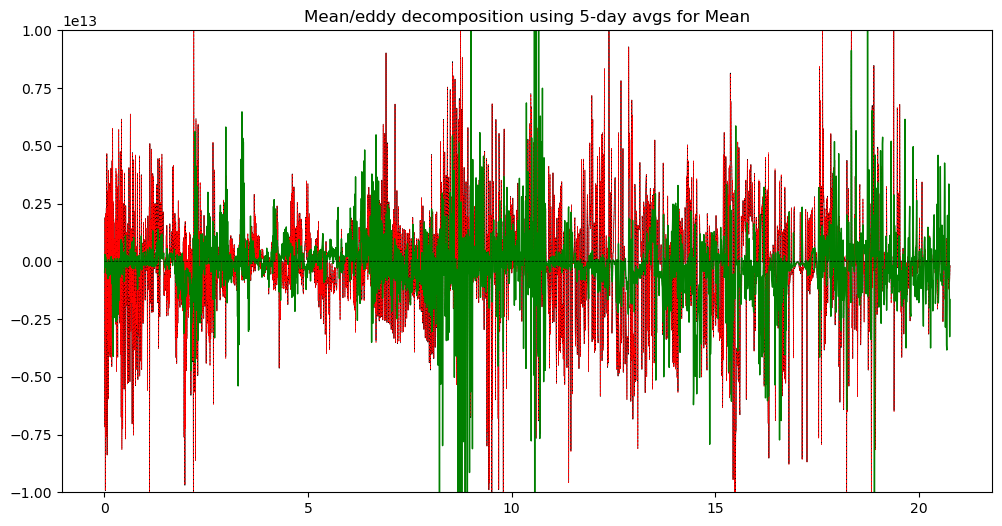

In [29]:
# - plot vert-summed:
fig, ax = plt.subplots(nrows=1, figsize = (12, 6))
# w/o cumsum
nxmax=-1
ax.plot(dist_along_10km[0:nxmax],np.sum(Total_transp_10km[:,0:nxmax], axis=0)*Cp*rho0,'-k',label='Total heat transport', linewidth=0.5)
ax.plot(dist_along_10km[0:nxmax],np.sum(Mean_transp_10km[:,0:nxmax], axis=0)*Cp*rho0,'--r',label='Mean advective heat transport', linewidth=0.5)
ax.plot(dist_along_10km[0:nxmax],np.sum(np.nanmean(Eddy_transp_10km[:,:,0:nxmax], axis=0), axis=0)*73*Cp*rho0,'-g',label='Eddy-induced heat transport', linewidth=1)
ax.plot(dist_along_10km[0:nxmax],np.ones(Mean_transp_10km[0,0:nxmax].shape),'--k', linewidth=0.5)
ax.set_ylim(-1e13,1e13)
plt.title('Mean/eddy decomposition using 5-day avgs for Mean')


Text(0.5, 0, 'Heat transport (W)')

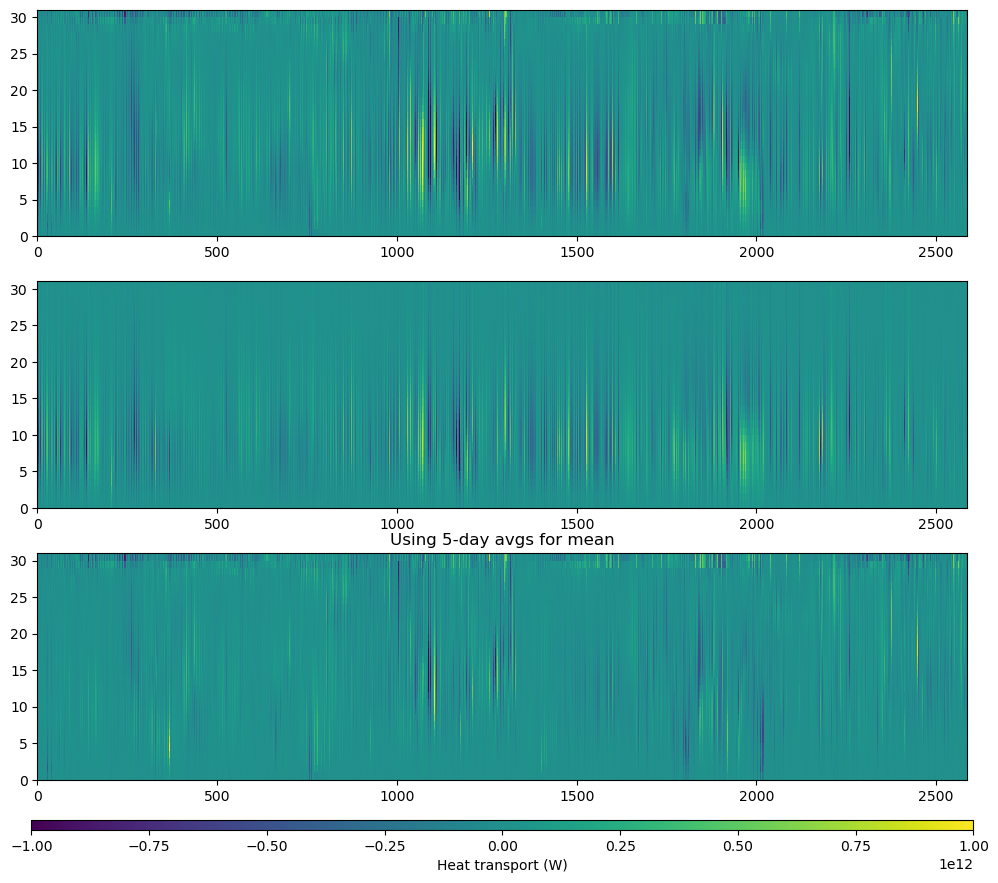

In [49]:
# - plot pcolormesh

Vmin=-1e12
Vmax=1e12

fig, ax = plt.subplots(nrows=3, figsize = (12, 10))
# w/o cumsum
# ht = ax[0].pcolormesh(Total_transp_10km[:,0:nxmax]*Cp*rho0, vmin=Vmin, vmax=Vmax)
ht = ax[0].pcolormesh((Mean_transp_10km[:,0:nxmax]+np.nanmean(Eddy_transp_10km[:,:,0:nxmax],axis=0)*73)*Cp*rho0, vmin=Vmin, vmax=Vmax)
ht = ax[1].pcolormesh(Mean_transp_10km[:,0:nxmax]*Cp*rho0, vmin=Vmin, vmax=Vmax)
ax[2].pcolormesh(np.nanmean(Eddy_transp_10km[:,:,0:nxmax],axis=0)*73*Cp*rho0, vmin=Vmin, vmax=Vmax)
# ax[3].pcolormesh(Total_transp_10km[:,0:200] - Mean_transp_10km[:,0:200])
plt.title('Using 5-day avgs for mean')

cbar_ax1 = fig.add_axes([0.12, 0.06, 0.785, 0.01])
fig.colorbar(ht, cax=cbar_ax1, orientation='horizontal')
cbar_ax1.set_xlabel('Heat transport (W)')#, labelpad=-35)

## 2nd test w/ monthly transport/temperature fields for mean HT

In [19]:
%%time

# re-sample to monthly following Palokzy 2018:
vol_transp_10km_monthly = np.empty((12,31,2588))
temp_10km_monthly  = np.empty((12,31,2588))

months=np.arange(0,73)*(5/30.41667)
months_flr = np.floor(months[:])

for mm in np.arange(0,12):
    # print(mm)
    aa=np.where(mm == months_flr)
    # print(aa[0])    
    # print(vol_transport_10km[aa[0],:,:].shape)

    temp_10km_monthly[mm,:] = temp_10km[aa[0],:,:].mean('ocean_time')
    # vol_transp_10km_monthly[mm,:] = np.nanmean(vol_transport_10km[aa[0],:,:], axis=0)
    vol_transp_10km_monthly[mm,:] = vol_transport_10km[aa[0],:,:].mean('ocean_time')
    del aa
    # print(vol_transp_10km_monthly.shape)


# total heat transport: average(vol_transp*T)
volxT_10kmB = vol_transp_10km_monthly*(temp_10km_monthly-Tf) # vT x Cp Rho0
Total_transp_10kmB =np.nanmean(volxT_10kmB, axis=0)

# mean heat transport: avg(vol_tranp)*avg(T)
vol_transp_10kmB_annual = np.nanmean(vol_transp_10km_monthly, axis=0)
temp_10kmB_annual = np.nanmean(temp_10km_monthly-Tf, axis=0)
Mean_transp_10kmB = vol_transp_10kmB_annual*temp_10kmB_annual

# eddy heat transport: (5-daily) vol_transp*T - total_HT
Eddy_transp_10kmB = np.empty(vol_transport_10km.shape)
for tt in range(0,12):
    Eddy_transp_10kmB_tmp =  - (Mean_transp_10kmB) + vol_transport_10km[tt,:,:]*(temp_10km[tt,:,:]-Tf)#*rho0*Cp
    #print(tt,Eddy_transp_10km_tmp.shape, Eddy_transp_10km.shape)
    Eddy_transp_10kmB[tt,:] = Eddy_transp_10kmB_tmp
    del Eddy_transp_10kmB_tmp
# FOR SOME REASON, IT SEEMS I NEED TO MULTIPLY EDDY HT by 12 (73 if using 5-daily fields)
    # -> then it matches (opposite sign) as the mean HT

CPU times: user 95.9 ms, sys: 9.43 ms, total: 105 ms
Wall time: 102 ms


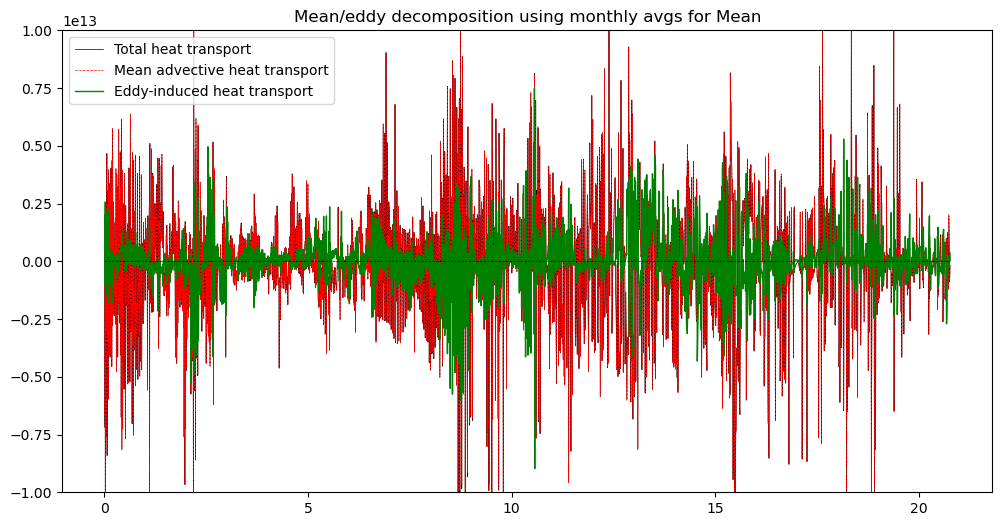

In [36]:
# - plot vert-summed:
fig, ax = plt.subplots(nrows=1, figsize = (12, 6))
# w/o cumsum
nxmax=-1
ax.plot(dist_along_10km[0:nxmax],np.sum(Total_transp_10kmB[:,0:nxmax], axis=0)*Cp*rho0,'-k',label='Total heat transport', linewidth=0.5)
ax.plot(dist_along_10km[0:nxmax],np.sum(Mean_transp_10kmB[:,0:nxmax], axis=0)*Cp*rho0,'--r',label='Mean advective heat transport', linewidth=0.5)
ax.plot(dist_along_10km[0:nxmax],np.sum(np.nanmean(Eddy_transp_10kmB[:,:,0:nxmax], axis=0), axis=0)*12*Cp*rho0,'-g',label='Eddy-induced heat transport', linewidth=1)
ax.plot(dist_along_10km[0:nxmax],np.zeros(Mean_transp_10kmB[0,0:nxmax].shape),'--k', linewidth=0.5)
ax.set_ylim(-1e13,1e13)
plt.title('Mean/eddy decomposition using monthly avgs for Mean')
plt.legend()


In [59]:
mean_cumsum = np.cumsum(np.sum(Mean_transp_10kmB[:,:], axis=0)*Cp*rho0)
eddy_cumsum = np.cumsum(np.sum(np.nanmean(Eddy_transp_10kmB[:,:,:], axis=0), axis=0)*12*Cp*rho0)
print(mean_cumsum[-1]*1e-12)
print(eddy_cumsum[-1]*1e-12)

# IT DOES MAKE SENSE, MEAN + EDDY WOULD BE AROUND -230 TW ->  -270 TW AT WAOM10

-312.9206911643693
79.65505251692328


Text(17, -600000000000000.0, 'East Antarctica')

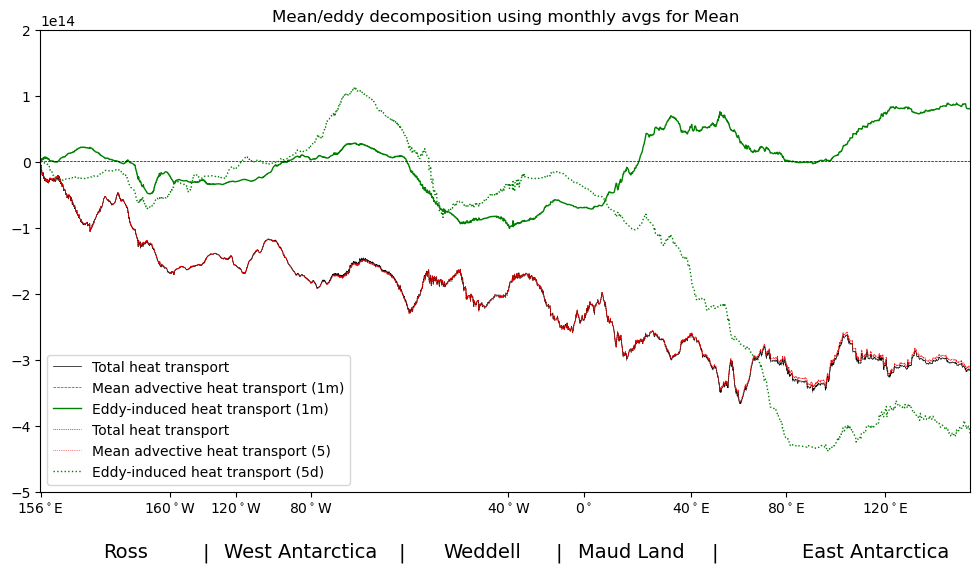

In [61]:
# - plot vert-summed:
fig, ax = plt.subplots(nrows=1, figsize = (12, 6))
# w/o cumsum
\
ax.plot(dist_along_10km[:],np.cumsum(np.sum(Total_transp_10kmB[:,:], axis=0)*Cp*rho0),'-k',label='Total heat transport', linewidth=0.5)
ax.plot(dist_along_10km[:],np.cumsum(np.sum(Mean_transp_10kmB[:,:], axis=0)*Cp*rho0),'--r',label='Mean advective heat transport (1m)', linewidth=0.5)
ax.plot(dist_along_10km[:],np.cumsum(np.sum(np.nanmean(Eddy_transp_10kmB[:,:,:], axis=0), axis=0)*12*Cp*rho0),'-g',label='Eddy-induced heat transport (1m)', linewidth=1)
ax.plot(dist_along_10km[:],np.zeros(Mean_transp_10kmB[0,:].shape),'--k', linewidth=0.5)

# 5days vars
ax.plot(dist_along_10km[:],np.cumsum(np.sum(Total_transp_10km[:,:], axis=0)*Cp*rho0),':k',label='Total heat transport', linewidth=0.5)
ax.plot(dist_along_10km[:],np.cumsum(np.sum(Mean_transp_10km[:,:], axis=0)*Cp*rho0),':r',label='Mean advective heat transport (5)', linewidth=0.5)
ax.plot(dist_along_10km[:],np.cumsum(np.sum(np.nanmean(Eddy_transp_10km[:,:,:], axis=0), axis=0)*73*Cp*rho0),':g',label='Eddy-induced heat transport (5d)', linewidth=1)
ax.set_ylim(-5e14,2e14)
plt.title('Mean/eddy decomposition using monthly avgs for Mean')
plt.legend()

ax.set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax.set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax.set_xlim(0, dist_along_10km[-1])
# 4) Mask Ross (140W : 160E, lat < -60)
ax.text(2.895576e+00-1.5,-6e14,'Ross',fontsize=14, color='k')
ax.text(3.634185,-6e14,'|',fontsize=14, color='k')
# 5) Mask West Antarctica (150W : 90W, lat < -65)
ax.text(4.1,-6e14,'West Antarctica',fontsize=14, color='k')
ax.text(8,-6e14,'|',fontsize=14, color='k')
# 1) Mask Weddell (90W : 25W, lat < -75, 65W : 25W, lat <= -75)
ax.text(9,-6e14,'Weddell',fontsize=14, color='k')
ax.text(11.5,-6e14,'|',fontsize=14, color='k')
# 2) Mask Maud Land (25W : 60E, lat < -60)
ax.text(12,-6e14,'Maud Land',fontsize=14, color='k')
ax.text(15,-6e14,'|',fontsize=14, color='k')
# 3) Mask East Antarctica (60E : 160E, lat < -60)
ax.text(17,-6e14,'East Antarctica',fontsize=14, color='k')

Text(0.5, 0, 'Heat transport (W)')

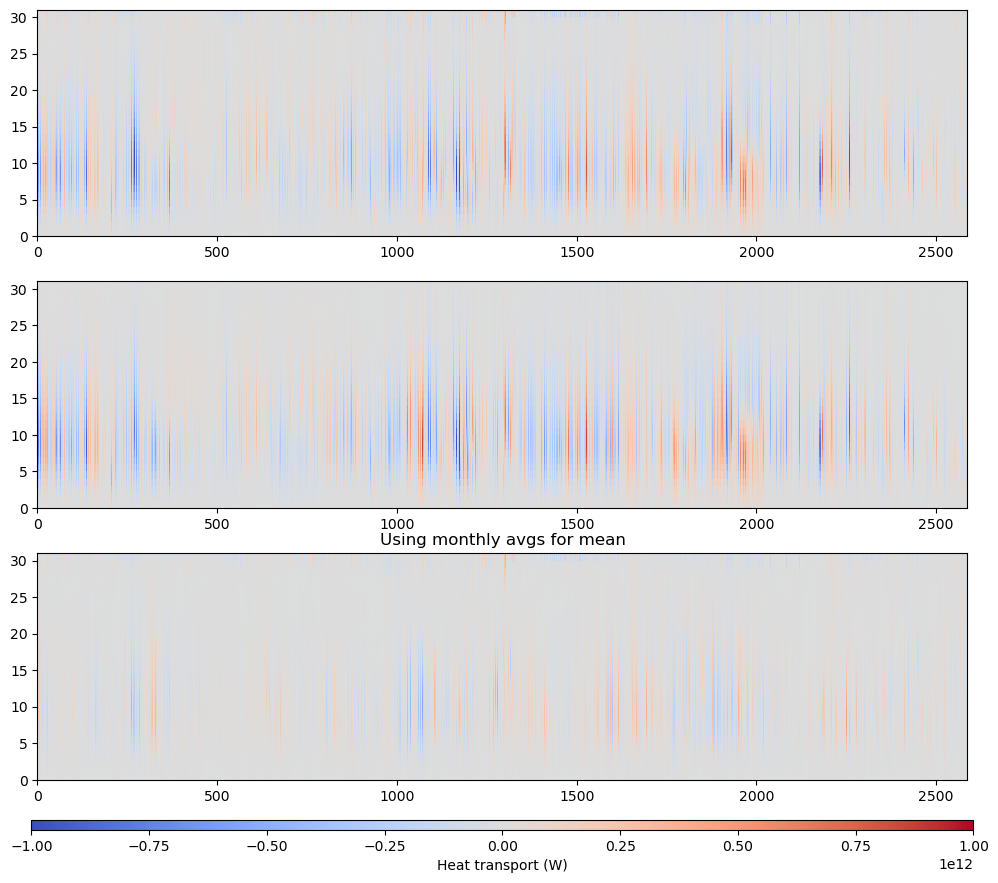

In [34]:
# - plot pcolormesh

Vmin=-1e12
Vmax=1e12
nxmax=-1

fig, ax = plt.subplots(nrows=3, figsize = (12, 10))
# w/o cumsum
# ht = ax[0].pcolormesh(Total_transp_10kmB[:,0:nxmax]*Cp*rho0, vmin=Vmin, vmax=Vmax)
ht = ax[0].pcolormesh((Mean_transp_10kmB[:,0:nxmax]+np.nanmean(Eddy_transp_10kmB[:,:,0:nxmax],axis=0)*12)*Cp*rho0, vmin=Vmin, vmax=Vmax, cmap=plt.cm.coolwarm)
ht = ax[1].pcolormesh(Mean_transp_10kmB[:,0:nxmax]*Cp*rho0, vmin=Vmin, vmax=Vmax, cmap=plt.cm.coolwarm)
ax[2].pcolormesh(np.nanmean(Eddy_transp_10kmB[:,:,0:nxmax],axis=0)*12*Cp*rho0, vmin=Vmin, vmax=Vmax, cmap=plt.cm.coolwarm)
# ax[3].pcolormesh(Total_transp_10km[:,0:200] - Mean_transp_10km[:,0:200])
plt.title('Using monthly avgs for mean')
cbar_ax1 = fig.add_axes([0.12, 0.06, 0.785, 0.01])
fig.colorbar(ht, cax=cbar_ax1, orientation='horizontal')
cbar_ax1.set_xlabel('Heat transport (W)')#, labelpad=-35)